<a href="https://colab.research.google.com/github/deboratech/projetos/blob/main/data_scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Realização da análise de cargos e salários para empregos relacionados ao campo de dados.

Dataset disponível em: https://www.kaggle.com/datasets/harishkumardatalab/data-science-salary-2021-to-2023/data

In [118]:
import pandas as pd


In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Leitura de dados

In [121]:
ds_salary = pd.read_csv('/content/ds_salary_2021_2023(2).csv', sep=';')


In [122]:
print(ds_salary)

      work_year experience_level employment_type                  job_title  \
0          2023               EN              FT          Applied Scientist   
1          2023               EN              FT          Applied Scientist   
2          2023               EN              FT       Data Quality Analyst   
3          2023               EN              FT    Compliance Data Analyst   
4          2023               EN              FT          Applied Scientist   
...         ...              ...             ...                        ...   
3756       2020               SE              FT   Principal Data Scientist   
3757       2020               SE              FT             Data Scientist   
3758       2020               SE              FT       Data Science Manager   
3759       2020               SE              FT  Machine Learning Engineer   
3760       2020               SE              FT             Data Scientist   

      salary salary_currency  salary_in_usd company

# Visualização dos 5 primeiros registros

In [123]:
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


# Visualização dos 5 últimos registros

In [124]:
ds_salary.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S
3760,2020,SE,FT,Data Scientist,412000,USD,412000,US,L


In [125]:
ds_salary = pd.DataFrame(ds_salary)
display(ds_salary)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


# Limpeza de dados
Retirando os dados duplicados.

In [126]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [127]:
ds_salary = ds_salary.drop_duplicates()
display(ds_salary)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


1.work_year: O ano em que a remuneração pelo trabalho foi registrada.

2.experience_level: O nível de experiência associado ao cargo, classificado da seguinte forma:
EN (Entry Level): Iniciante
MI (Mid Level): Intermediário
SE (Senior): Sênior
EX (Executive): Executivo (cargos de liderança e/ou chefia).

3.employment_type: O tipo de vínculo empregatício, determinado pela carga horária, incluindo:
FT (Full Time): Período Integral
PT (Partial Time): Meio Período
CT (Contract): Contrato definido - apenas durante a vigência do projeto
FL (Freelancer).

4.job_title: O título do cargo ocupado pelo profissional.

5.salary: A remuneração total do profissional.

6.salary_currency: A moeda na qual o salário está registrado.

7.salary_in_usd: O salário convertido para dólares americanos.

8.company_location: O país onde a empresa empregadora está sediada.

9.company_size: O tamanho da empresa com base no número de funcionários, classificado como:
S (Small): Pequena
M (Medium): Média
L (Large): Grande.







# Retirando NaN.



In [128]:
#ds_salary = ds_salary.replace([float('NaN')],'-')
ds_salary = ds_salary.dropna()
display(ds_salary)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


# Renomeando colunas





In [129]:
ds_salary.rename(columns={'work_year':'Ano de Trabalho'}, inplace=True)
ds_salary.rename(columns={'experience_level':'Nivel de Experiencia'}, inplace=True)
ds_salary.rename(columns={'employment_type':'Carga Horaria'}, inplace=True)
ds_salary.rename(columns={'job_title':'Cargo'}, inplace=True)
ds_salary.rename(columns={'salary':'Salario'}, inplace=True)
ds_salary.rename(columns={'salary_currency':'Moeda'}, inplace=True)
ds_salary.rename(columns={'salary_in_usd':'Salario em Dolar'}, inplace=True)
ds_salary.rename(columns={'company_location':'Localizacao da Empresa'}, inplace=True)
ds_salary.rename(columns={'company_size':'Tamanho da Empresa'}, inplace=True)

# Exibição das colunas do dataset

In [130]:
ds_salary.columns.tolist()

['Ano de Trabalho',
 'Nivel de Experiencia',
 'Carga Horaria',
 'Cargo',
 'Salario',
 'Moeda',
 'Salario em Dolar',
 'Localizacao da Empresa',
 'Tamanho da Empresa']

In [131]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano de Trabalho         2410 non-null   int64 
 1   Nivel de Experiencia    2410 non-null   object
 2   Carga Horaria           2410 non-null   object
 3   Cargo                   2410 non-null   object
 4   Salario                 2410 non-null   int64 
 5   Moeda                   2410 non-null   object
 6   Salario em Dolar        2410 non-null   int64 
 7   Localizacao da Empresa  2410 non-null   object
 8   Tamanho da Empresa      2410 non-null   object
dtypes: int64(3), object(6)
memory usage: 188.3+ KB


# Agrupamentos e contagens

Contagem de profissionais por cargo

In [132]:
cargos_cont = ds_salary.groupby(['Cargo'])['Cargo'].count()
display(cargos_cont)

Cargo
3D Computer Vision Researcher     4
AI Developer                     11
AI Programmer                     2
AI Scientist                     16
Analytics Engineer               85
                                 ..
Research Engineer                33
Research Scientist               63
Software Data Engineer            2
Staff Data Analyst                1
Staff Data Scientist              1
Name: Cargo, Length: 93, dtype: int64

In [260]:
salariocientista = grupo_profissao['Salario'].value_counts()
salcien = salariocientista.get("Data Scientist")
display(salcien)

Salario
100000      11
120000      11
90000        9
110000       9
70000        8
            ..
4000000      1
4200000      1
6600000      1
11000000     1
30400000     1
Name: Salario, Length: 302, dtype: int64

In [300]:
ch_cont = ds_salary.groupby(['Carga Horaria'])['Carga Horaria'].count()
display(ch_cont)

Carga Horaria
CT      10
FL      10
FT    2373
PT      17
Name: Carga Horaria, dtype: int64

In [301]:
# FT (Full Time): Período Integral
# PT (Partial Time): Meio Período
# CT (Contract): Contrato definido
# FL (Freelancer)

In [289]:
cont_moeda = ds_salary.groupby(['Moeda'])['Moeda'].count()
display(cont_moeda)

Moeda
AUD       9
BRL       6
CAD      25
CHF       4
CLP       1
CZK       1
DKK       3
EUR     199
GBP     139
HKD       1
HUF       3
ILS       1
INR      59
JPY       3
MXN       1
PLN       5
SGD       6
THB       2
TRY       3
USD    1939
Name: Moeda, dtype: int64

In [133]:
contagem_cientista_dados = ds_salary['Cargo'].value_counts().get("Data Scientist", 0)
print(contagem_cientista_dados)


492


In [134]:
contagem_engenheiro_dados = ds_salary['Cargo'].value_counts().get("Data Engineer", 0)
print(contagem_engenheiro_dados)

529


In [135]:
contagem_analista_dados = ds_salary['Cargo'].value_counts().get("Data Analyst", 0)
print(contagem_analista_dados)

356


# Demonstrativo de médias

In [273]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [274]:
ds_scientist = ds_salary[(ds_salary['Cargo'] == 'Data Scientist')]
print(ds_scientist['Salario'].describe())



count        492.000
mean      298126.744
std      1523747.412
min        10000.000
25%        90000.000
50%       136807.000
75%       183357.500
max     30400000.000
Name: Salario, dtype: float64


In [275]:
ds_scientist = ds_salary[(ds_salary['Cargo'] == 'Data Scientist') & (ds_salary['Moeda'] == 'USD')]
print(ds_scientist['Salario'].describe())



count      375.000
mean    152054.875
std      57465.599
min      10000.000
25%     114375.000
50%     147000.000
75%     185500.000
max     412000.000
Name: Salario, dtype: float64


In [276]:
ds_scientist = ds_salary[(ds_salary['Cargo'] == 'Data Scientist') & (ds_salary['Moeda'] == 'EUR')]
print(ds_scientist['Salario'].describe())

count       52.000
mean     55603.462
std      19330.302
min      19000.000
25%      41400.000
50%      55000.000
75%      70000.000
max     110000.000
Name: Salario, dtype: float64


In [277]:
dt_eng = ds_salary[(ds_salary['Cargo'] == 'Data Engineer')]
print(dt_eng['Salario'].describe())


count       529.000
mean     165101.858
std      263599.980
min       12000.000
25%       92700.000
50%      135000.000
75%      185000.000
max     4450000.000
Name: Salario, dtype: float64


In [278]:
dt_eng = ds_salary[(ds_salary['Cargo'] == 'Data Engineer') & (ds_salary['Moeda'] == 'USD')]
print(dt_eng['Salario'].describe())


count      438.000
mean    154445.032
std      58359.649
min      12000.000
25%     110000.000
50%     150000.000
75%     193375.000
max     324000.000
Name: Salario, dtype: float64


In [279]:
dt_eng = ds_salary[(ds_salary['Cargo'] == 'Data Engineer') & (ds_salary['Moeda'] == 'EUR')]
print(dt_eng['Salario'].describe())

count       43.000
mean     56829.744
std      17665.198
min      22000.000
25%      45000.000
50%      60000.000
75%      67500.000
max     105120.000
Name: Salario, dtype: float64


In [280]:
dt_analy = ds_salary[(ds_salary['Cargo'] == 'Data Analyst')]
print(dt_analy['Salario'].describe())

count       356.000
mean     118523.626
std      119246.916
min        8000.000
25%       65825.000
50%      104150.000
75%      136065.000
max     1300000.000
Name: Salario, dtype: float64


In [281]:
dt_analy = ds_salary[(ds_salary['Cargo'] == 'Data Analyst') & (ds_salary['Moeda'] == 'USD')]
print(dt_analy['Salario'].describe())

count      300.000
mean    114392.817
std      47901.267
min       8000.000
25%      80000.000
50%     110000.000
75%     139700.000
max     385000.000
Name: Salario, dtype: float64


In [282]:
dt_analy = ds_salary[(ds_salary['Cargo'] == 'Data Analyst') & (ds_salary['Moeda'] == 'EUR')]
print(dt_analy['Salario'].describe())

count      17.000
mean    36691.765
std     12290.450
min      8760.000
25%     30000.000
50%     38000.000
75%     48000.000
max     54000.000
Name: Salario, dtype: float64


In [283]:
grupo_profissao = ds_salary.groupby('Cargo')


In [293]:
media_salario_por_profissao = grupo_profissao['Salario em Dolar'].mean()


In [285]:
media_cientista_dados = media_salario_por_profissao.get("Data Scientist", 0)
media_engenheiro_dados = media_salario_por_profissao.get("Data Engineer", 0)
media_analista_dados= media_salario_por_profissao.get("Data Analyst", 0)

In [295]:
print(f'Média de salário para Cientista de Dados: ${media_cientista_dados}')
print(f'Média de salário para Engenheiro de Dados: ${media_engenheiro_dados}')
print(f'Média de salário para Analista de Dados: ${media_analista_dados}')



Média de salário para Cientista de Dados: $298126.743902439
Média de salário para Engenheiro de Dados: $165101.8582230624
Média de salário para Analista de Dados: $118523.62640449438


# Demonstrativo de porcentagem

In [296]:
diferenca_engenheiro = media_cientista_dados - media_engenheiro_dados
diferenca_analista = media_cientista_dados - media_analista_dados



In [297]:
porcentagem_a_mais_engenheiro = (diferenca_engenheiro / media_engenheiro_dados) * 100
porcentagem_a_mais_analista = (diferenca_analista / media_analista_dados) * 100

In [298]:
print(f"O salário de Cientista de Dados é {porcentagem_a_mais_engenheiro:.2f}% maior que o salário de Engenheiro de Dados.")
print(f"O salário de Cientista de Dados é {porcentagem_a_mais_analista:.2f}% maior que o salário de Analista de Dados.")


O salário de Cientista de Dados é 80.57% maior que o salário de Engenheiro de Dados.
O salário de Cientista de Dados é 151.53% maior que o salário de Analista de Dados.


# Visualização dos dados

In [146]:
sns.set_theme(style="darkgrid")


In [302]:
medias = [media_cientista_dados, media_engenheiro_dados, media_analista_dados]


In [303]:
profissoes = ["Cientista de Dados", "Engenheiro de Dados", "Analista de Dados"]


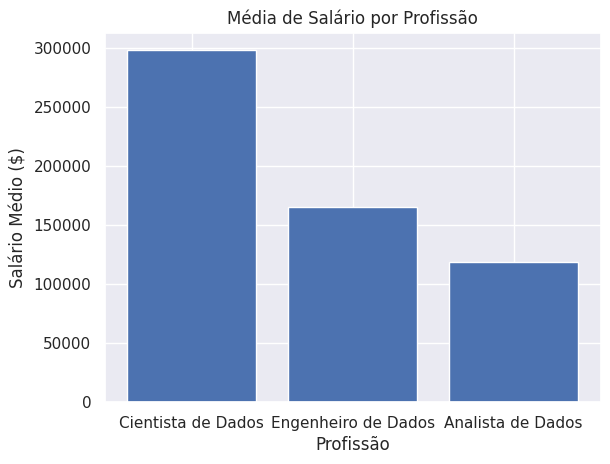

In [304]:
plt.bar(profissoes, medias)
plt.xlabel('Profissão')
plt.ylabel('Salário Médio ($)')
plt.title('Média de Salário por Profissão')

plt.show()


O salário do Cientista de Dados é 80,57% superior ao salário do Engenheiro de Dados e 151,53% maior do que o salário do Analista de Dados.

In [150]:
paises = ds_salary['Localizacao da Empresa'].unique()
print(paises)

['US' 'NG' 'IN' 'CA' 'ES' 'GH' 'DE' 'CH' 'AU' 'SE' 'BR' 'GB' 'VN' 'BA'
 'GR' 'HK' 'NL' 'FI' 'IE' 'SG' 'SI' 'MX' 'FR' 'HR' 'AM' 'KE' 'RO' 'TH'
 'CF' 'UA' 'IL' 'CO' 'PT' 'EE' 'LV' 'MK' 'PK' 'IT' 'MA' 'AR' 'CR' 'IR'
 'HU' 'AS' 'BE' 'AT' 'ID' 'LU' 'MY' 'CZ' 'DZ' 'RU' 'PL' 'LT' 'TR' 'BO'
 'EG' 'AL' 'SK' 'PR' 'AE' 'DK' 'IQ' 'CN' 'BS' 'JP' 'CL' 'MD' 'MT' 'PH'
 'HN' 'NZ']


In [151]:
cientistas_de_dados = ds_salary.loc[ds_salary['Cargo'] == 'Data Scientist']


In [152]:
contagem_por_pais = cientistas_de_dados.groupby('Localizacao da Empresa').size().reset_index(name='Quantidade de Cientistas de Dados')
print(contagem_por_pais)


   Localizacao da Empresa  Quantidade de Cientistas de Dados
0                      AT                                  2
1                      AU                                  2
2                      BE                                  2
3                      BR                                  4
4                      CA                                 18
5                      CH                                  2
6                      CL                                  1
7                      DE                                 13
8                      DZ                                  1
9                      EE                                  1
10                     ES                                 10
11                     FR                                 14
12                     GB                                 29
13                     HK                                  1
14                     HU                                  2
15                     I

In [153]:
contagem_por_pais = contagem_por_pais.sort_values(by='Quantidade de Cientistas de Dados', ascending=False)
top_4_paises = contagem_por_pais.head(4)


In [175]:
explode = (0.1, 0, 0, 0)


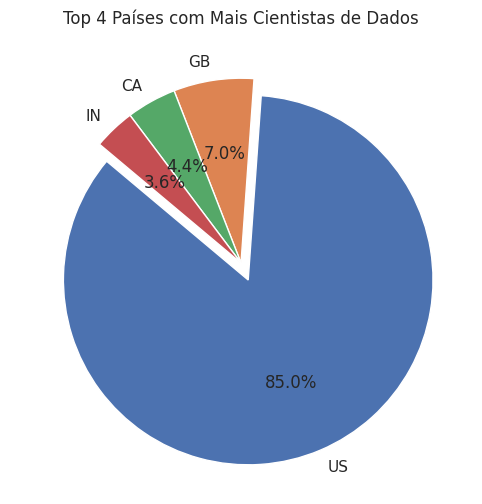

In [176]:
plt.figure(figsize=(10, 6))
plt.pie(top_4_paises['Quantidade de Cientistas de Dados'], labels=top_4_paises['Localizacao da Empresa'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Top 4 Países com Mais Cientistas de Dados')
plt.show()

Na análise apresentada, destaca-se que os países com a maior concentração de Cientistas de Dados são os Estados Unidos (85%), seguidos pela Grã-Bretanha (7%), Canadá (4,4%) e Índia (3,6%).


In [155]:
cientistas_de_dados = ds_salary.loc[ds_salary['Cargo'] == 'Data Scientist']


In [156]:
agrupamento_por_nivel = cientistas_de_dados.groupby('Nivel de Experiencia').size().reset_index(name='Quantidade')


In [157]:
agrupamento_por_nivel['Cargo'] = 'Data Scientist'

print(agrupamento_por_nivel)

  Nivel de Experiencia  Quantidade           Cargo
0                   EN          57  Data Scientist
1                   EX           8  Data Scientist
2                   MI         140  Data Scientist
3                   SE         287  Data Scientist


In [158]:
# EN = Entry Level = Iniciante
# MI = Mid level = Intermediário
# SE = Senior = Senior
# EX = Executive = Executivo

In [159]:
cientistas_de_dados = ds_salary.loc[ds_salary['Cargo'] == 'Data Scientist']


In [160]:
contagem_por_nivel = cientistas_de_dados['Nivel de Experiencia'].value_counts().reset_index()


In [161]:
contagem_por_nivel.columns = ['Nível de Experiência', 'Quantidade']


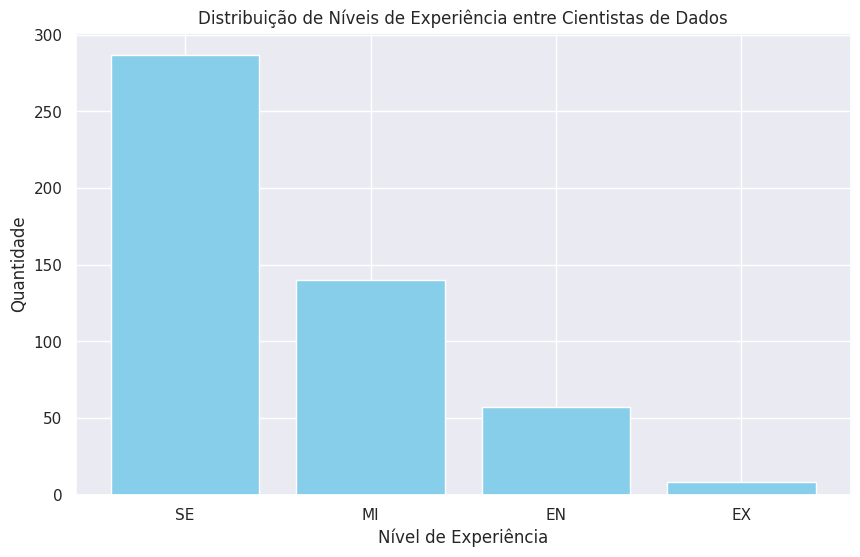

In [162]:
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_nivel['Nível de Experiência'], contagem_por_nivel['Quantidade'], color='skyblue')
plt.xlabel('Nível de Experiência')
plt.ylabel('Quantidade')
plt.title('Distribuição de Níveis de Experiência entre Cientistas de Dados')
plt.show()

Dentre as vagas ocupadas no cargo de Cientista de Dados, o maior número é de nível "senior" e o menor de "executive".

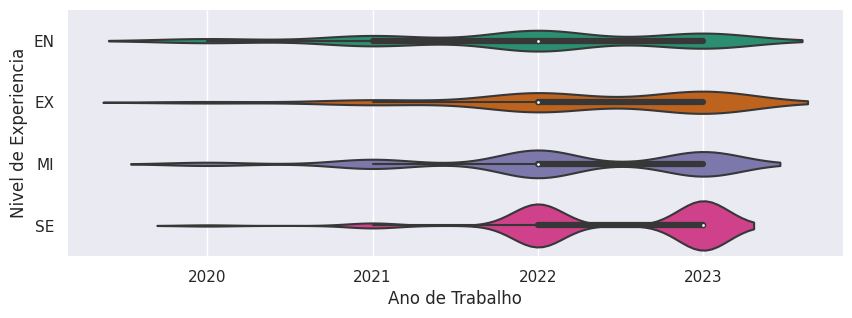

In [163]:
figsize = (10, 0.8 * len(ds_salary['Nivel de Experiencia'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ds_salary, x='Ano de Trabalho', y='Nivel de Experiencia', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [164]:
listaano = ds_salary['Ano de Trabalho'].tolist()
listatamanho = ds_salary['Tamanho da Empresa'].tolist()
listacargo = ds_salary['Cargo'].tolist()
listach = ds_salary['Carga Horaria'].tolist()
lsalarioc = salcien.tolist()

In [165]:
df = ds_salary

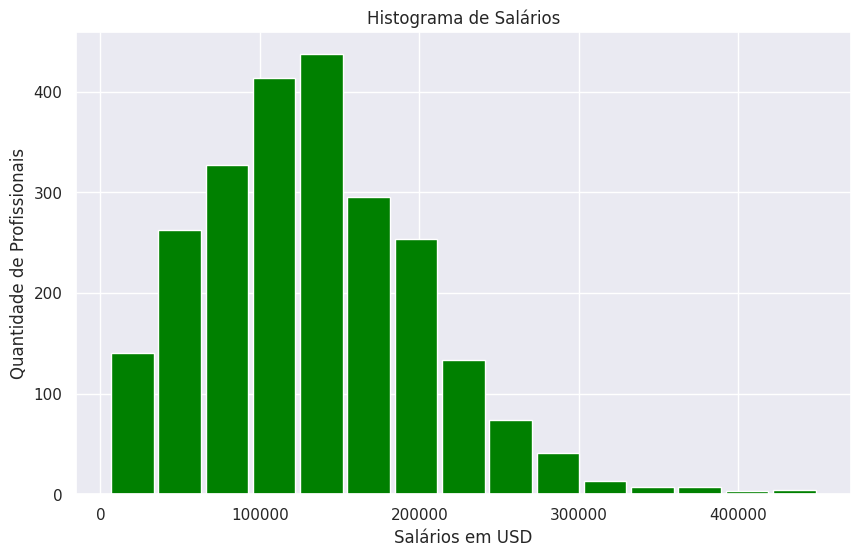

In [177]:
plt.figure(figsize=(10, 6))
plt.hist(df['Salario em Dolar'], 15, rwidth=0.9, alpha=1, color='green')
plt.xlabel('Salários em USD')
plt.ylabel('Quantidade de Profissionais')
plt.title('Histograma de Salários')
plt.show()